### TASK-2: 80 CEREALS

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


### READING DATA

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\archive (10)\cereal.csv")

In [3]:
datac = data.copy()
datac.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
data.shape

(77, 16)

In [5]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
datac.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [7]:
datac.duplicated().sum()

0

In [8]:
datac.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

### DISTRIBUTION OF MANUFACTURER  AND TYPE OF  CEREAL 

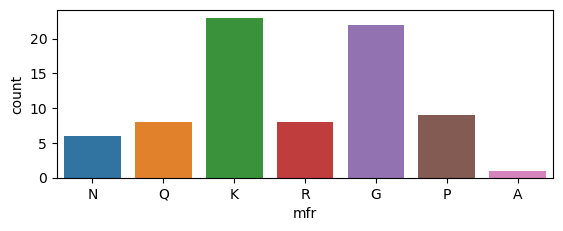

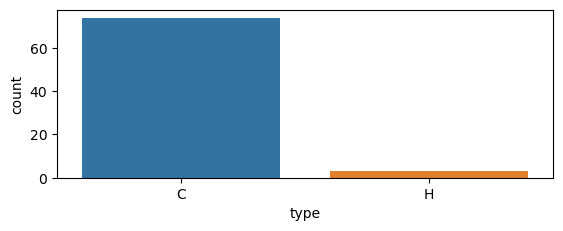

In [14]:
plt.subplot(2,1,1)
sns.countplot(data=datac,x='mfr')
plt.show()

plt.subplot(2,1,2)
sns.countplot(data=datac,x='type')
plt.show()

### MINIMUM, MAXIMUM, AVERAGE RATING FOR GIVEN DATA 

In [10]:
datac['rating'].agg(['min','max','mean'])

min     18.042851
max     93.704912
mean    42.665705
Name: rating, dtype: float64

### RATING ABOVE 50

In [11]:
high_rating = datac[datac['rating']>=50]
high_rating_num = high_rating.select_dtypes(include=['float','int'])
high_rating_num.pop('rating')
agg = high_rating_num.agg(['mean','max','min'])
agg

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
mean,87.619048,3.285714,0.428571,96.904762,3.604762,13.857143,2.52381,122.809524,16.666667,2.142857,0.944286,0.786667
max,110.000000,6.000000,2.000000,290.000000,14.000000,21.000000,7.00000,330.000000,25.000000,3.000000,1.000000,1.250000
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,1.000000,0.500000,0.250000


### DISTRIBUTION OF RATING

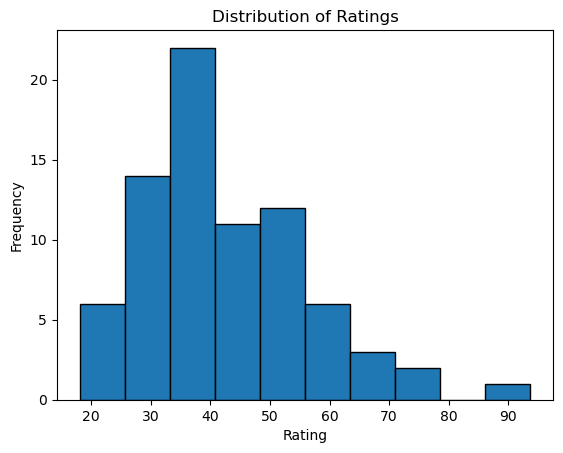

In [16]:
plt.hist(datac['rating'],edgecolor = 'black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [17]:
datac[['fat','protein','vitamins','shelf']].agg(['nunique','unique'])

,fat,protein,vitamins,shelf
nunique,5,6,3,3
unique,"[1, 5, 0, 2, 3]","[4, 3, 2, 1, 6, 5]","[25, 0, 100]","[3, 1, 2]"


### AVERAGE RATING FOR GRAMS OF FAT 

In [19]:
datac.groupby('fat')['rating'].mean().sort_values(ascending=False)

fat
0    51.778261
1    38.855205
2    36.446123
3    35.472138
5    33.983679
Name: rating, dtype: float64

### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO FAT 

<Axes: xlabel='fat', ylabel='fiber'>

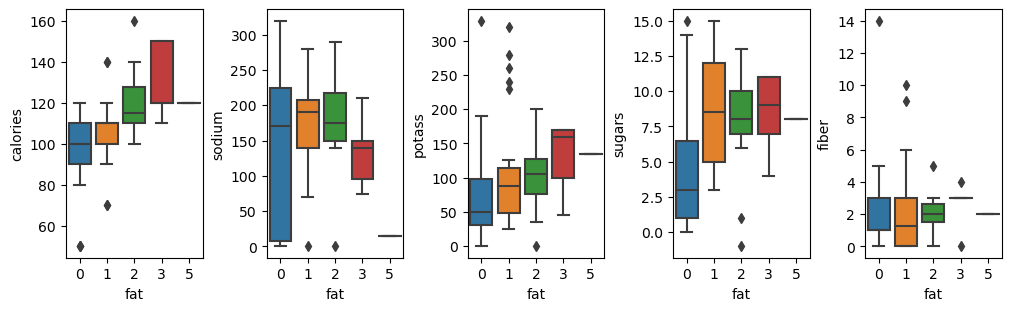

In [24]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout='constrained')
sns.boxplot(data=datac,x='fat',y='calories',ax=axs[0])
sns.boxplot(data=datac,x='fat',y='sodium',ax=axs[1])
sns.boxplot(data=datac,x='fat',y='potass',ax=axs[2])
sns.boxplot(data=datac,x='fat',y='sugars',ax=axs[3])
sns.boxplot(data=datac,x='fat',y='fiber',ax=axs[4])


### AVERAGE RATING GRAMS OF PROTEIN

In [26]:
datac.groupby('protein')['rating'].mean().sort_values(ascending=False)

protein
4    55.312610
6    51.948161
5    50.828392
3    45.432570
2    41.310069
1    29.474616
Name: rating, dtype: float64

### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO PROTEIN

<Axes: xlabel='protein', ylabel='fiber'>

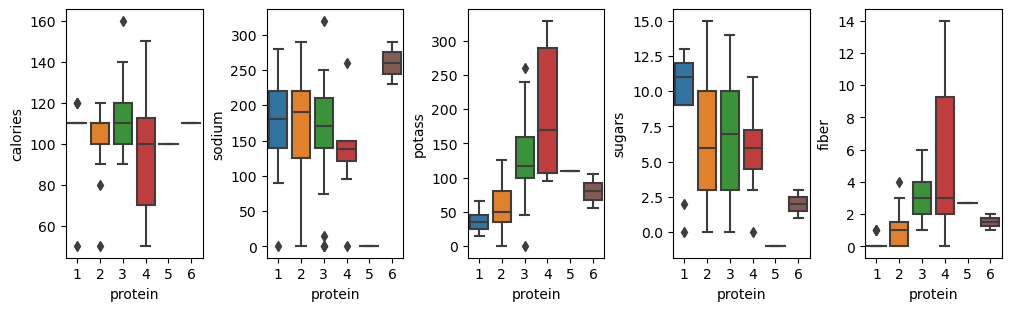

In [27]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout='constrained')
sns.boxplot(data=datac,x='protein',y='calories',ax=axs[0])
sns.boxplot(data=datac,x='protein',y='sodium',ax=axs[1])
sns.boxplot(data=datac,x='protein',y='potass',ax=axs[2])
sns.boxplot(data=datac,x='protein',y='sugars',ax=axs[3])
sns.boxplot(data=datac,x='protein',y='fiber',ax=axs[4])


### AVERAGE RATING CONSIDERING VITAMINS

In [29]:
datac.groupby('vitamins')['rating'].mean().sort_values(ascending=False)

vitamins
0      61.077283
25     40.762713
100    38.098352
Name: rating, dtype: float64

### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO VITAMINS

<Axes: xlabel='vitamins', ylabel='fiber'>

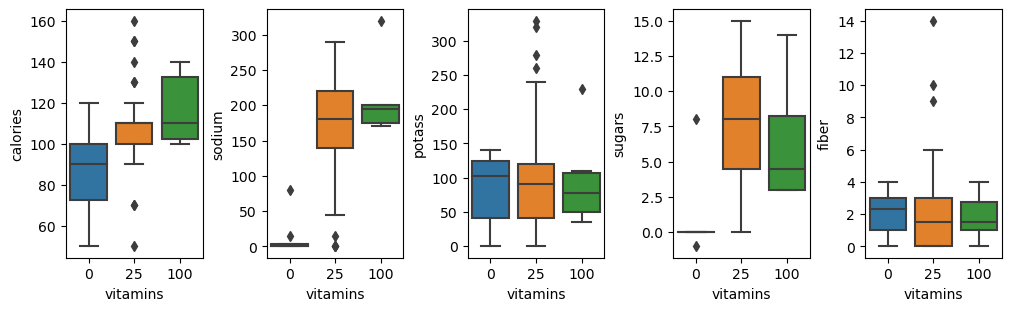

In [30]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout='constrained')
sns.boxplot(data=datac,x='vitamins',y='calories',ax=axs[0])
sns.boxplot(data=datac,x='vitamins',y='sodium',ax=axs[1])
sns.boxplot(data=datac,x='vitamins',y='potass',ax=axs[2])
sns.boxplot(data=datac,x='vitamins',y='sugars',ax=axs[3])
sns.boxplot(data=datac,x='vitamins',y='fiber',ax=axs[4])


### AVERAGE RATING OF SHELF

In [31]:
datac.groupby('shelf')['rating'].mean().sort_values(ascending=False)

shelf
1    46.145439
3    45.220032
2    34.972827
Name: rating, dtype: float64

### UNDERSTANDING NUTRITIONAL COMPOSITION WITH RESPECT TO SHELF

<Axes: xlabel='shelf', ylabel='fiber'>

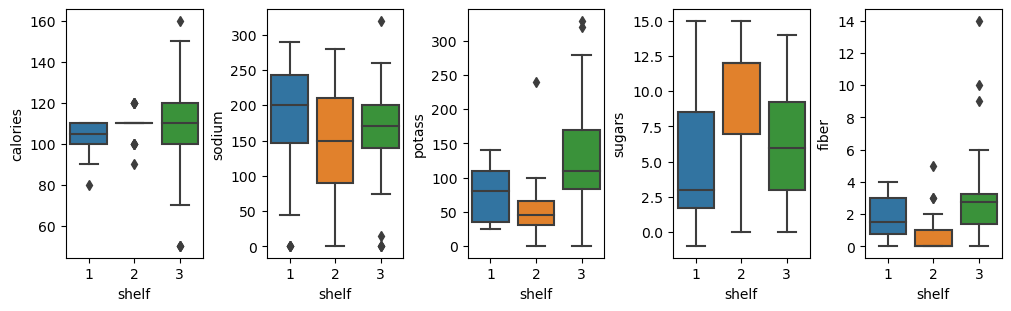

In [32]:
fig,axs = plt.subplots(1,5,figsize=(10,3),layout='constrained')
sns.boxplot(data=datac,x='shelf',y='calories',ax=axs[0])
sns.boxplot(data=datac,x='shelf',y='sodium',ax=axs[1])
sns.boxplot(data=datac,x='shelf',y='potass',ax=axs[2])
sns.boxplot(data=datac,x='shelf',y='sugars',ax=axs[3])
sns.boxplot(data=datac,x='shelf',y='fiber',ax=axs[4])


### DISTRIBUTION OF MFR OVER TYPE

<Axes: xlabel='mfr', ylabel='count'>

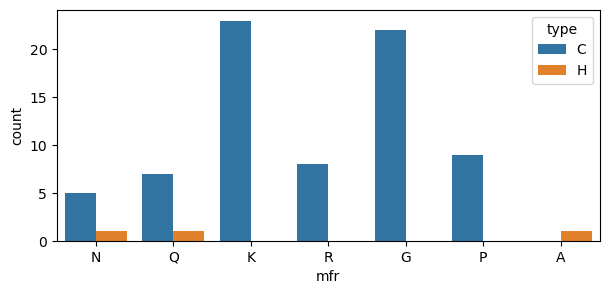

In [33]:
fig = plt.figure(figsize=(7,3))
sns.countplot(data=datac,x='mfr',hue='type')

###  PROPORTIONAL CHAR FOR MANUFACUTRER AND TYPE

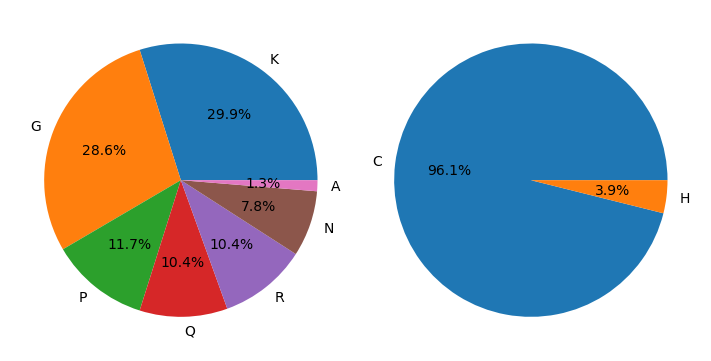

In [38]:
fig,axs = plt.subplots(1,2,figsize=(7,9),layout='constrained')
p=datac['mfr'].value_counts(normalize=True)
axs[0].pie(p.values,labels=p.index,autopct='%1.1f%%')
q=datac['type'].value_counts(normalize=True)
axs[1].pie(q.values,labels=q.index,autopct='%1.1f%%')
plt.show()

### RELATION BETWEEN RATING AND SODIUM,FIBER,POTASSIUM

<Axes: xlabel='potass', ylabel='rating'>

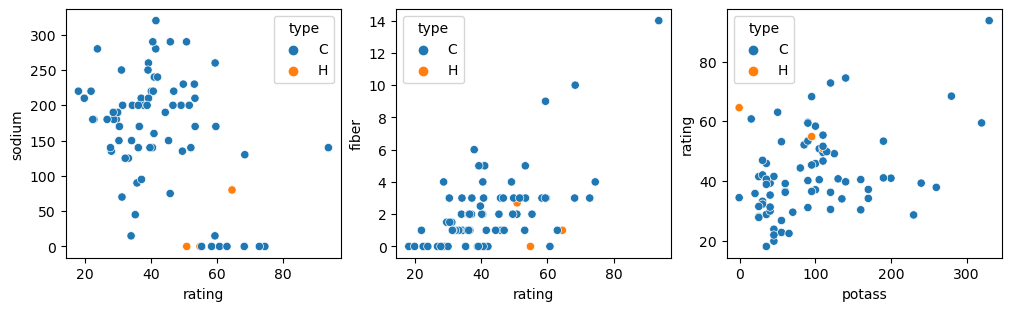

In [41]:
fig,axs = plt.subplots(1,3,figsize=(10,3),layout='constrained')
sns.scatterplot(data=datac,y='sodium',x='rating',hue='type',ax=axs[0])
sns.scatterplot(data=datac,y='fiber',x='rating',hue='type',ax=axs[1])
sns.scatterplot(data=datac,y='rating',x='potass',hue='type',ax=axs[2])

### RATING VS NUTRIENTS

<Axes: xlabel='vitamins', ylabel='rating'>

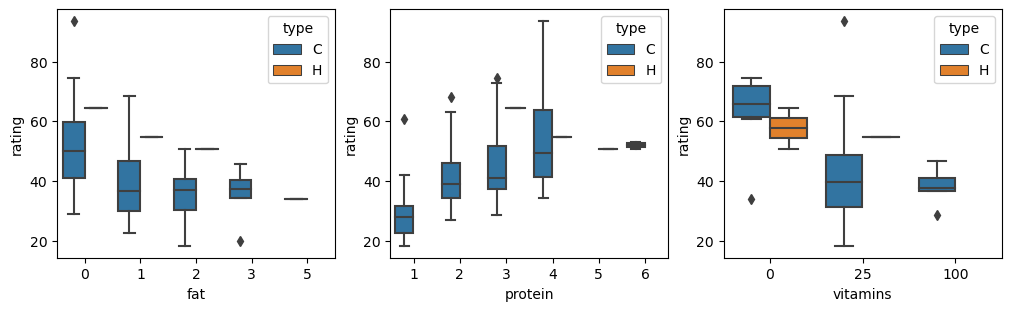

In [46]:
fig,axs = plt.subplots(1,3,figsize=(10,3),layout='constrained')
sns.boxplot(data=datac,x='fat',y='rating',hue='type',ax=axs[0])
sns.boxplot(data=datac,x='protein',y='rating',hue='type',ax=axs[1])
sns.boxplot(data=datac,y='rating',x='vitamins',hue='type',ax=axs[2])

### HISTPLOT FOR WEIGHT AND CUPS

<Axes: xlabel='cups', ylabel='Count'>

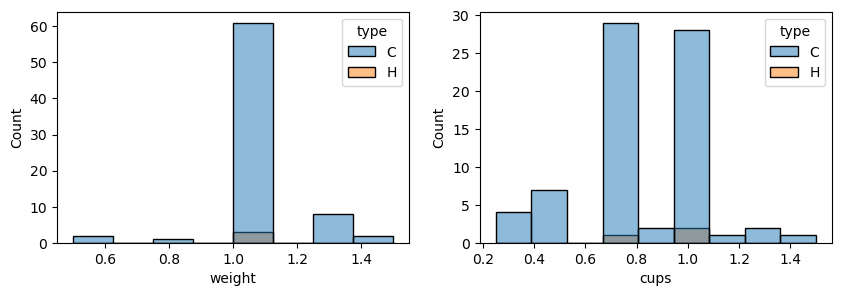

In [47]:
fig,axs = plt.subplots(1,2,figsize=(10,3))
sns.histplot(data=datac, x='weight', hue='type', ax=axs[0])
sns.histplot(data=datac, x='cups', hue='type', ax=axs[1])